In [1]:
import csv
import operator
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
dataframes = {
    "cooking": pd.read_csv("../../input_light/cooking_light.csv"),
    "crypto": pd.read_csv("../../input_light/crypto_light.csv"),
    "robotics": pd.read_csv("../../input_light/robotics_light.csv"),
    "biology": pd.read_csv("../../input_light/biology_light.csv"),
    "travel": pd.read_csv("../../input_light/travel_light.csv"),
    "diy": pd.read_csv("../../input_light/diy_light.csv"),
    "physics": pd.read_csv("../../input_light/physics_light.csv"),
}
# df to csv make list to string, converting it back
for name, df in dataframes.items():
    if(name != "physics"):
        df["tags"] = df["tags"].replace(r"\[(.*)\]", r"\1",regex=True).str.replace("'","").str.split(",")

## Word Cloud representation of Title and Content

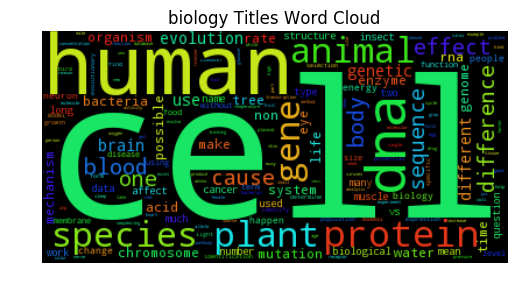

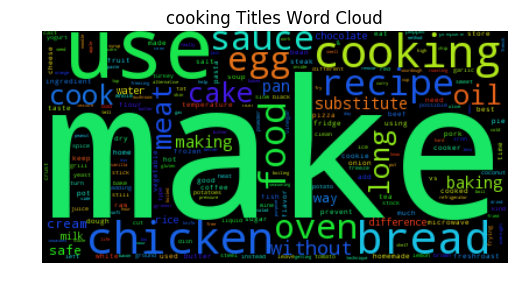

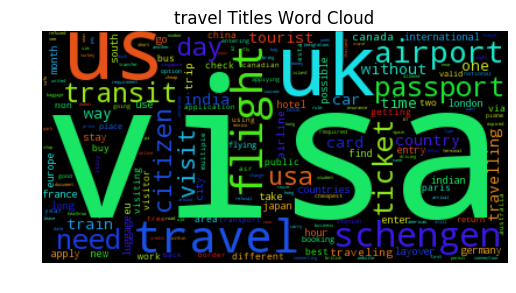

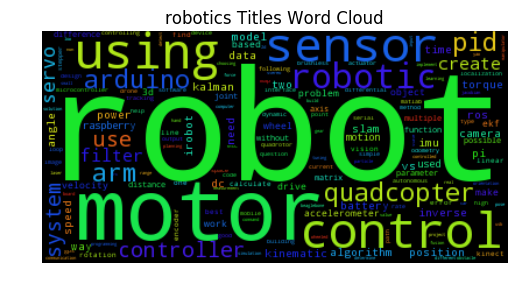

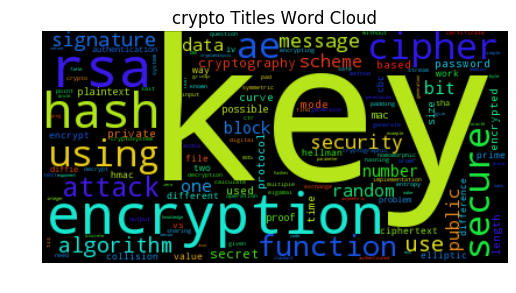

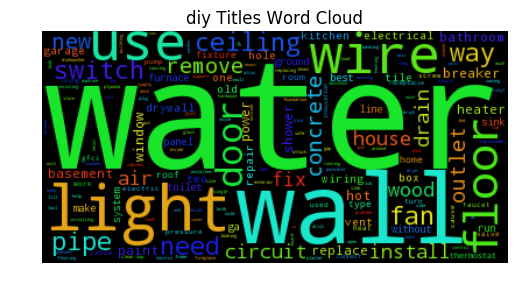

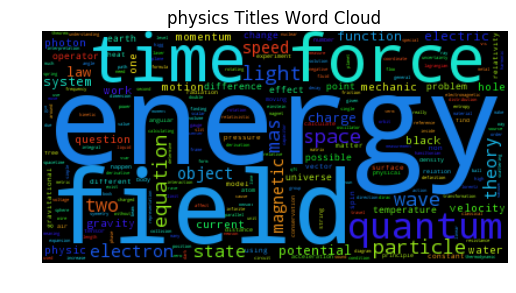

In [9]:
for name, df in dataframes.items():
    text = df['title'].str.cat(sep=' ') 
    wc_title = WordCloud(max_words=1000,
               random_state=1).generate(text)
    plt.figure()
    plt.imshow(wc_title)
    plt.axis("off")
    plt.title(name +' Titles Word Cloud')
    plt.show()

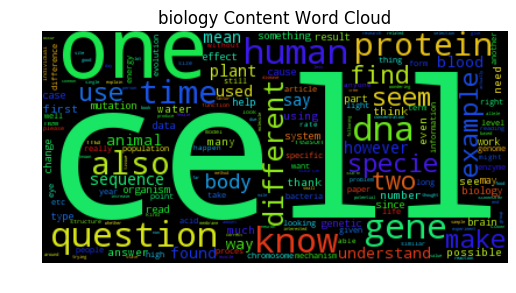

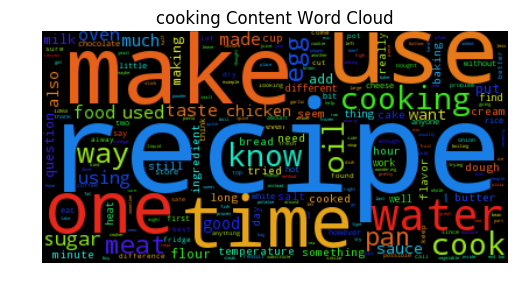

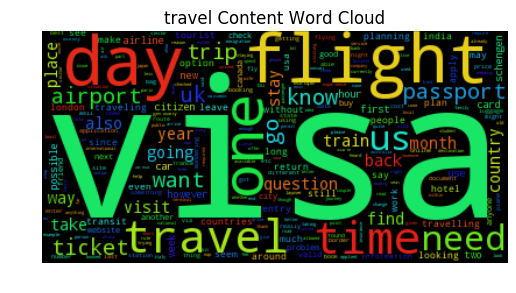

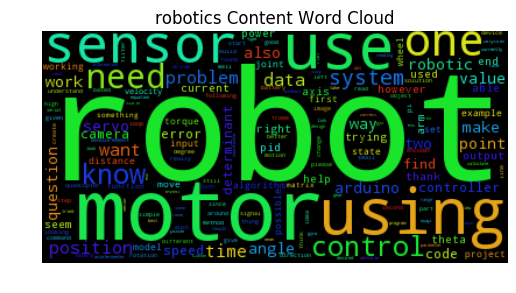

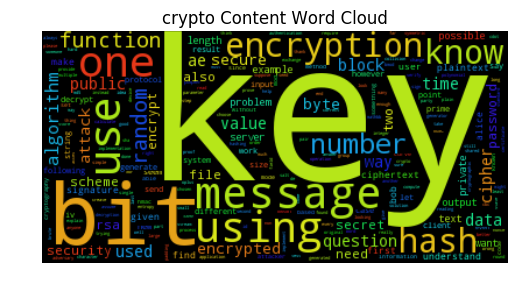

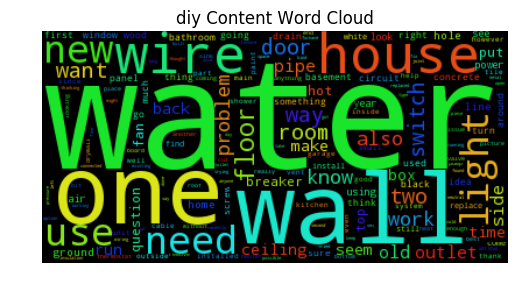

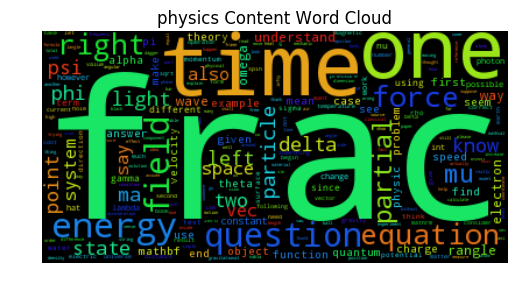

In [10]:
for name, df in dataframes.items():
    text = df['content'].str.cat(sep=' ') 
    wc_content = WordCloud(max_words=1000,
               random_state=1).generate(text)
    plt.figure()
    plt.imshow(wc_content)
    plt.axis("off")
    plt.title(name +' Content Word Cloud')
    plt.show()

## Word Cloud representation of Tags

In [3]:
# TagsDict contains the number of occurences of each tag, by
# category: tagsDict[nameOfCategory][nameOfTag] = number of occurences
# "tagName" in tagsDict[nameOfCategory] = True if "tagName" is a tag for nameOfCategory
tagsDict = {}
print("Topic\t\t# Tags\t\tMost popular\t\tOccurences")
for name, df in dataframes.items():
    if(name != "physics"):
        #Dictionnaire des tag
        tagsDict[name] = {}
        for tags in df['tags']:
            for tag in tags:
                if (tag in tagsDict[name]):
                    tagsDict[name][tag] += 1
                else:
                    tagsDict[name][tag] = 1
                    
        popularTag = max(tagsDict[name], key=tagsDict[name].get)
        print("{}\t\t{}\t\t{}\t\t{}".format(name, len(tagsDict[name]), popularTag, tagsDict[name][popularTag]))

Topic		# Tags		Most popular		Occurences
biology		1095		human-biology		1447
cooking		1265		baking		1423
travel		2084		visas		3775
robotics		383		mobile-robot		283
crypto		650		encryption		1719
diy		1269		electrical		4479


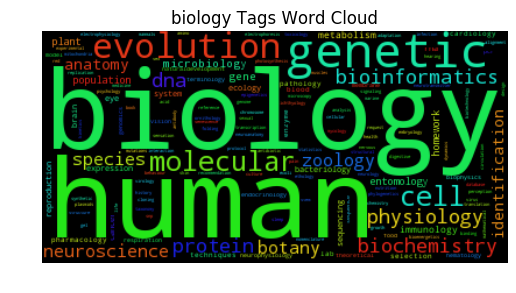

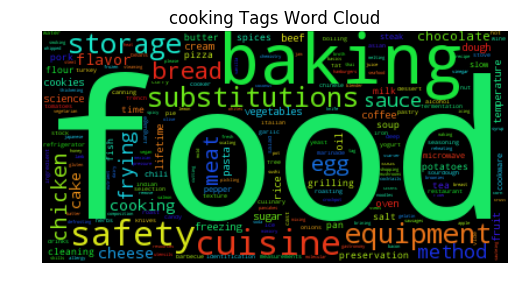

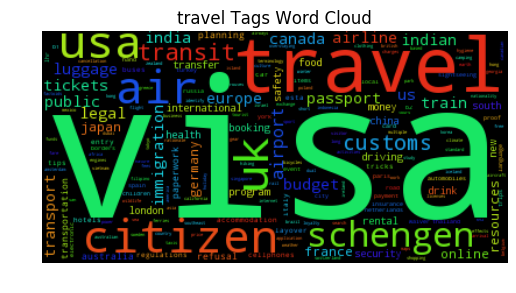

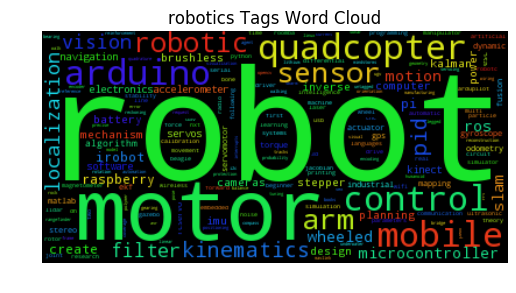

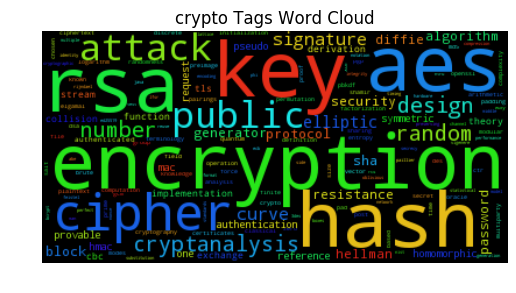

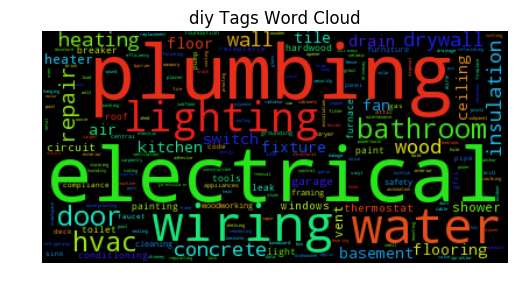

In [12]:
for name, df in dataframes.items():
    if(name != "physics"):
        text = df['tags'].apply(lambda x: ' '.join(x)).str.cat(sep=' ') 
        wc_content = WordCloud(max_words=1000,
                   random_state=1).generate(text)
        plt.figure()
        plt.imshow(wc_content)
        plt.axis("off")
        plt.title(name +' Tags Word Cloud')
        plt.show()

In [22]:
occurences = {}
for name, df in dataframes.items():
    if(name != "physics"):
        #Dictionnaire des tag
        occurences[name] = {}
        for tag in tagsDict[name]:
            sSpace = tag.split(" ")
            sTiret = tag.split("-")
            sUnders = tag.split("_")
            nbr = max(max(len(sSpace), len(sTiret)), len(sUnders))
            if nbr in occurences[name].keys():
                occurences[name][nbr] += 1
            else:
                occurences[name][nbr] = 1

In [23]:
for name, df in dataframes.items():
    if(name != "physics"):
        for nbr in occurences[name]:
            print(name, nbr, occurences[name][nbr])

('biology', 1, 291)
('biology', 2, 782)
('biology', 3, 22)
('cooking', 1, 403)
('cooking', 2, 848)
('cooking', 3, 12)
('cooking', 4, 2)
('travel', 1, 282)
('travel', 2, 1691)
('travel', 3, 99)
('travel', 4, 12)
('robotics', 1, 112)
('robotics', 2, 268)
('robotics', 3, 3)
('crypto', 1, 119)
('crypto', 2, 460)
('crypto', 3, 67)
('crypto', 4, 2)
('crypto', 5, 2)
('diy', 1, 387)
('diy', 2, 848)
('diy', 3, 34)


In [25]:
Biology = [291, 782, 22, 0]
Cooking =[403, 848, 12, 2]
Travel = [282, 1691, 99, 12]
Robotics = [112, 268, 3, 0]
Crypto = [119, 460, 67, 2]
Diy = [387, 848, 34, 0]

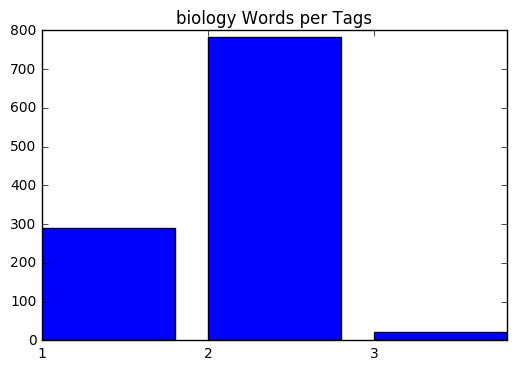

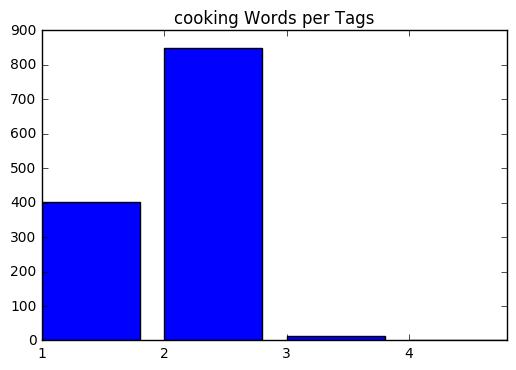

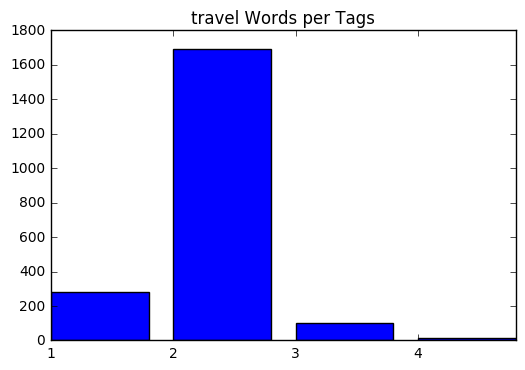

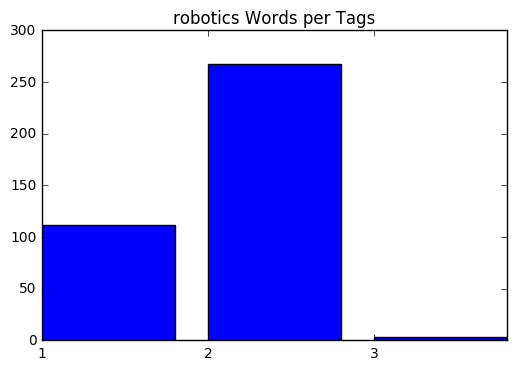

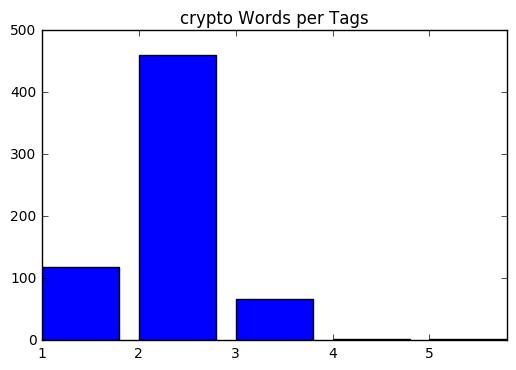

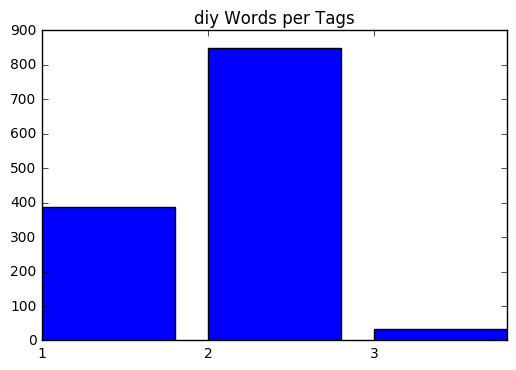

In [43]:
for name, df in dataframes.items():
    if(name != "physics"):
        xint = []
        yint = []
        for nbr in occurences[name]:
            xint.append(nbr)
            yint.append(occurences[name][nbr])
        ax = plt.figure().gca()
        plt.xticks(xint)
        ax.bar(xint, yint)
        plt.title(name +' Words per Tags')

In [111]:
pin = {}
for name, df in dataframes.items():
    if(name != "physics"):
        n = 0
        pin[name] = {}
        pin[name]["title"] = {}
        pin[name]["content"] = {}
        pin[name]["both"] = {}
        for i in range(len(df["tags"])):
            n += 1
            nbT = 0.
            nbC = 0.
            nbr = 1./len(df["tags"][i])
            for tag in df["tags"][i]:
                if (tag in df["title"][i]):
                    nbT += nbr
                if(type(df["content"][i]) is float):
                    print(i, df["content"][i], type(df["content"][i]))
                    continue
                if (tag in df["content"][i]):
                    nbC += nbr
            
            nbB = min(nbC + nbT, 1)
            
            if nbT in pin[name]["title"].keys():
                pin[name]["title"][nbT] += 1
            else:
                pin[name]["title"][nbT] = 1
                
            if nbC in pin[name]["content"].keys():
                pin[name]["content"][nbC] += 1
            else:
                pin[name]["content"][nbC] = 1
                
            if nbB in pin[name]["both"].keys():
                pin[name]["both"][nbB] += 1
            else:
                pin[name]["both"][nbB] = 1

(1473, nan, <type 'float'>)
(1956, nan, <type 'float'>)


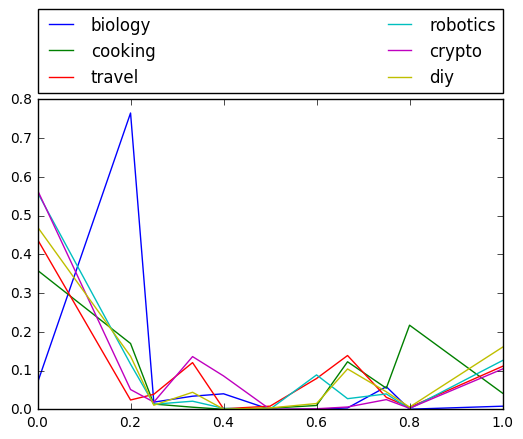

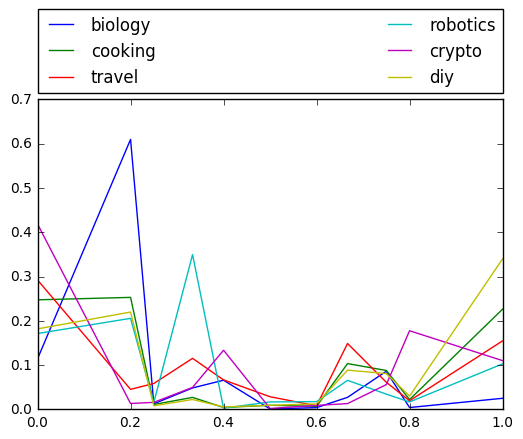

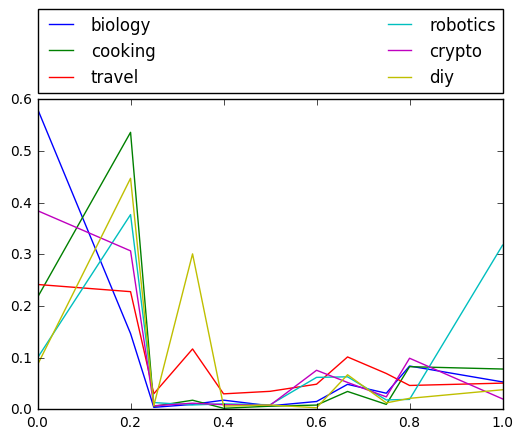

In [113]:
for name, df in dataframes.items():
    if(name != "physics"):
        #plt.plot(sorted(pin[name]["title"].keys()), pin[name]["title"].values(), label=name)
        plt.plot(sorted(pin[name]["title"].keys()), [float(i)/sum(pin[name]["title"].values()) for i in pin[name]["title"].values()], label=name)
        
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

for name, df in dataframes.items():
    if(name != "physics"):
        #plt.plot(sorted(pin[name]["title"].keys()), pin[name]["title"].values(), label=name)
        plt.plot(sorted(pin[name]["content"].keys()), [float(i)/sum(pin[name]["content"].values()) for i in pin[name]["content"].values()], label=name)
        
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

for name, df in dataframes.items():
    if(name != "physics"):
        #plt.plot(sorted(pin[name]["title"].keys()), pin[name]["title"].values(), label=name)
        plt.plot(sorted(pin[name]["both"].keys()), [float(i)/sum(pin[name]["both"].values()) for i in pin[name]["both"].values()], label=name)
        
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()